# Shallow model explanation with channel-wise occlusion

In [23]:
import numpy as np
import pandas as pd
# import h5py
import importlib
import seaborn as sns
import matplotlib.pyplot as plt
from brain_age_prediction import utils, viz
importlib.reload(utils)
importlib.reload(viz)

<module 'brain_age_prediction.viz' from '/home/laurar/brain_age_1D-CNN/src/brain_age_prediction/viz.py'>

In [11]:
save_dir = '/ritter/share/projects/laura_riedel_thesis/'
# load colour maps
network_colour_map = viz.get_colour_map('network')
area_colour_map = viz.get_colour_map('area')

## Global explanations

In [12]:
occlusion_df = utils.get_occlusion_overview('shallow')
occlusion_df

,eid,parcellation,hemisphere,network,area,pred diff
0,1217464,LH_Vis_1,LH,Vis,full Vis,-0.190620
1,1217464,LH_Vis_2,LH,Vis,full Vis,2.078072
2,1217464,LH_Vis_3,LH,Vis,full Vis,0.323120
3,1217464,LH_Vis_4,LH,Vis,full Vis,0.201530
4,1217464,LH_Vis_5,LH,Vis,full Vis,-0.727669
...,...,...,...,...,...,...
499995,1053119,RH_Default_PFCdPFCm_1,RH,Default,PFCdPFCm,-0.466999
499996,1053119,RH_Default_PFCdPFCm_2,RH,Default,PFCdPFCm,-1.411400
499997,1053119,RH_Default_PFCdPFCm_3,RH,Default,PFCdPFCm,1.372879
499998,1053119,RH_Default_pCunPCC_1,RH,Default,pCunPCC,-1.019325


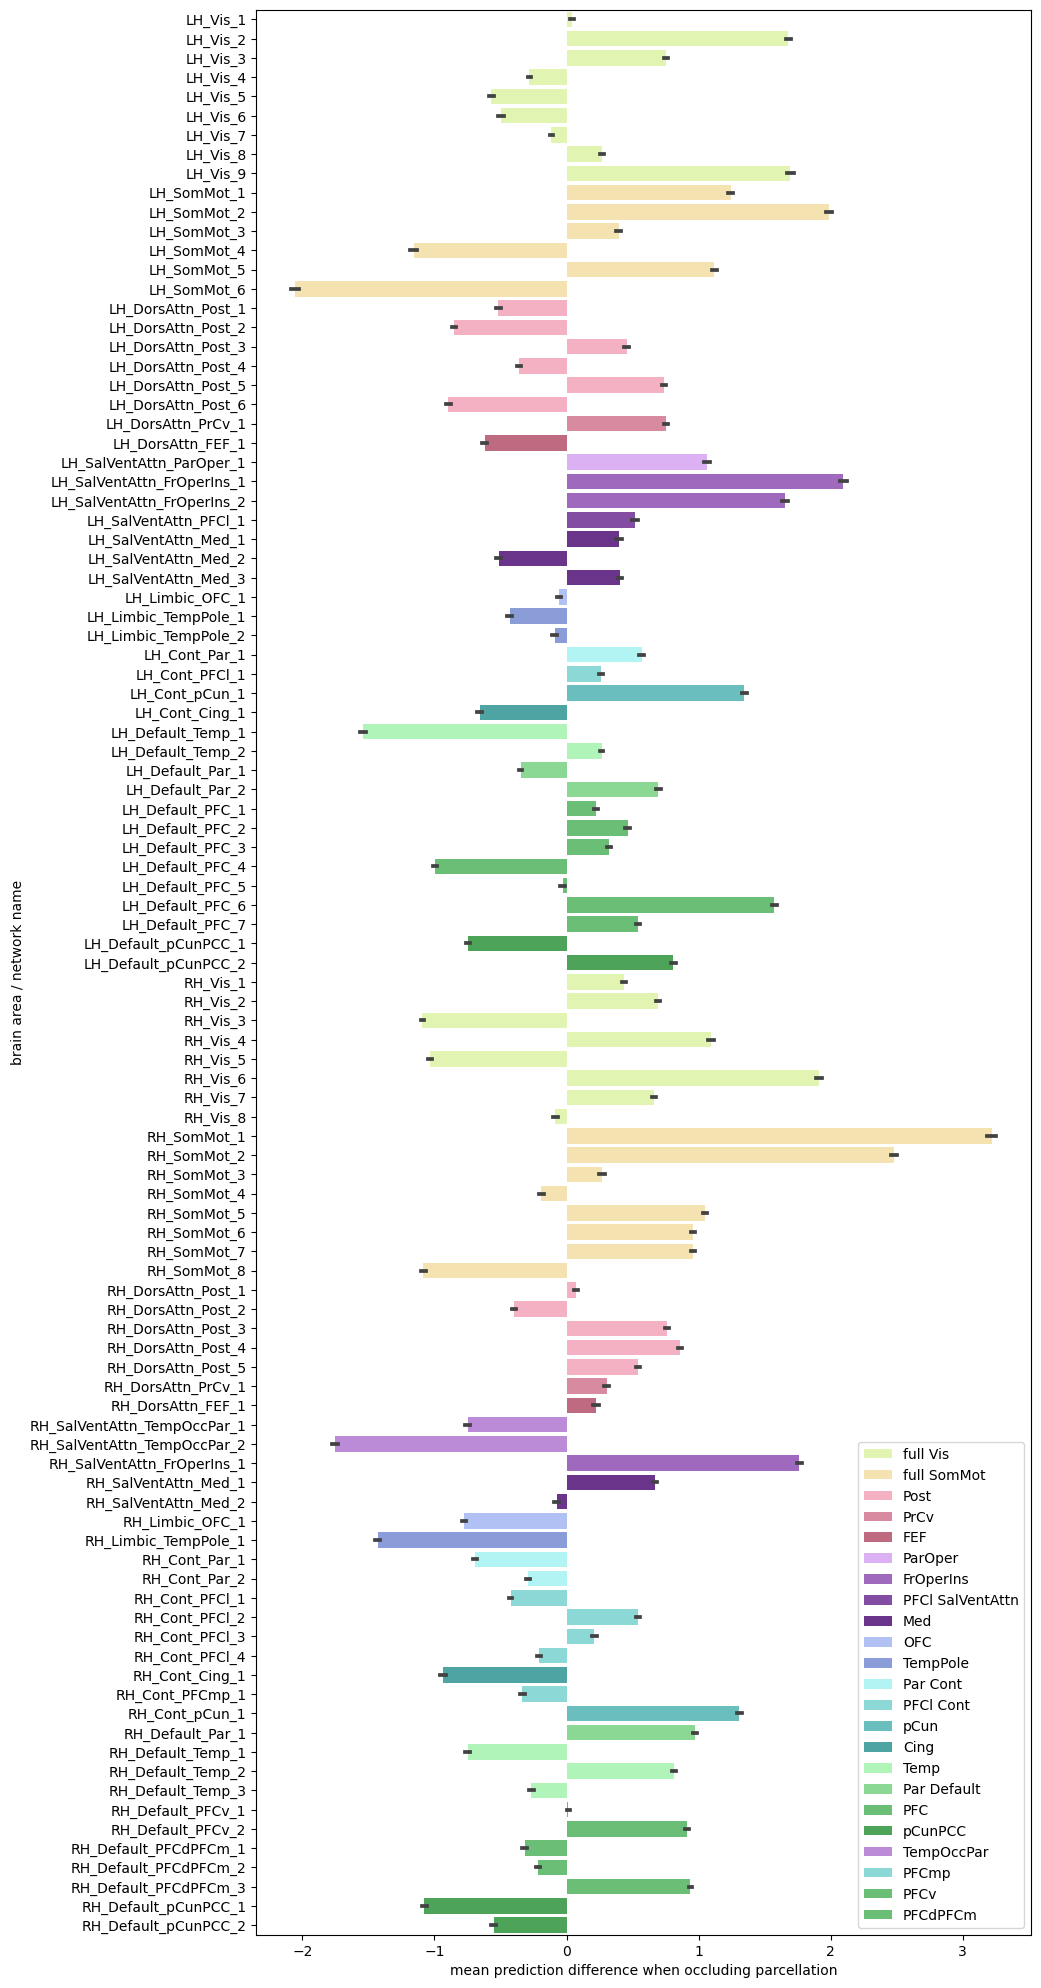

In [4]:
fig, ax = plt.subplots(figsize=(10,25))
sns.barplot(data=occlusion_df,
            x='pred diff',
            y='parcellation',
            orient='h',
            hue='area',
            palette=area_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean prediction difference when occluding parcellation',
       ylabel='brain area / network name')
ax.legend(loc='lower right')
plt.show()

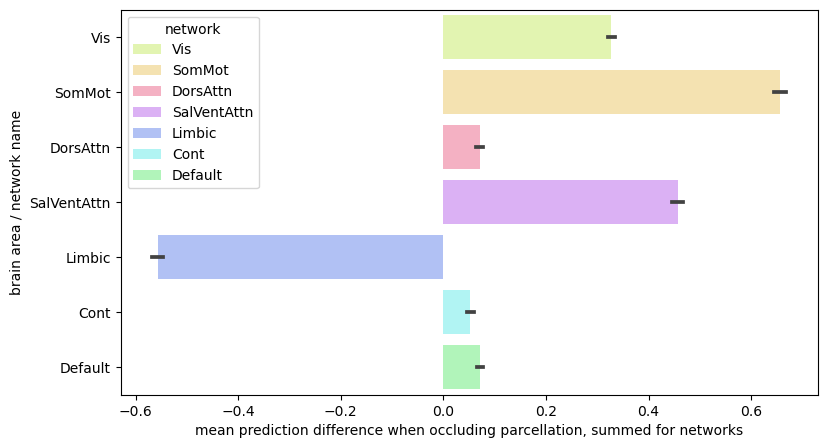

In [5]:
# "raw" network mean
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data=occlusion_df,
            x='pred diff',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean prediction difference when occluding parcellation, summed for networks',
       ylabel='brain area / network name')
plt.show()

In [6]:
# add area mean + area weight column
occlusion_df, area_mean_df = utils.calculate_areamean_weights_df(occlusion_df, 'pred diff')
occlusion_df

,eid,parcellation,hemisphere,network,area,pred diff,area weight,mean area pred diff
0,1217464,LH_Vis_1,LH,Vis,full Vis,-0.190620,1.000,0.327292
1,1217464,LH_Vis_2,LH,Vis,full Vis,2.078072,1.000,0.327292
2,1217464,LH_Vis_3,LH,Vis,full Vis,0.323120,1.000,0.327292
3,1217464,LH_Vis_4,LH,Vis,full Vis,0.201530,1.000,0.327292
4,1217464,LH_Vis_5,LH,Vis,full Vis,-0.727669,1.000,0.327292
...,...,...,...,...,...,...,...,...
499995,1450682,RH_Default_PFCdPFCm_2,RH,Default,PFCdPFCm,-0.280533,0.125,0.135695
499996,1450682,RH_Default_PFCdPFCm_3,RH,Default,PFCdPFCm,1.370880,0.125,0.135695
499997,1053119,RH_Default_PFCdPFCm_1,RH,Default,PFCdPFCm,-0.466999,0.125,0.135695
499998,1053119,RH_Default_PFCdPFCm_2,RH,Default,PFCdPFCm,-1.411400,0.125,0.135695


In [7]:
area_mean_df

,network,area,area weight,mean area pred diff
0,Vis,full Vis,1.000000,0.327292
1,SomMot,full SomMot,1.000000,0.656744
2,DorsAttn,Post,0.733333,0.036378
3,DorsAttn,PrCv,0.133333,0.528107
4,DorsAttn,FEF,0.133333,-0.198424
5,SalVentAttn,Med,0.416667,0.177387
6,SalVentAttn,FrOperIns,0.250000,1.838356
7,SalVentAttn,TempOccPar,0.166667,-1.251510
8,SalVentAttn,ParOper,0.083333,1.066961
9,SalVentAttn,PFCl SalVentAttn,0.083333,0.517828


In [8]:
weighted_networks_df = utils.get_weighted_network_average(occlusion_df, value='mean area pred diff')
weighted_networks_df

,network,weighted mean
0,Vis,0.327292
1,SomMot,0.656744
2,DorsAttn,0.044344
3,SalVentAttn,0.438966
4,Limbic,-0.578789
5,Cont,0.056273
6,Default,0.072477


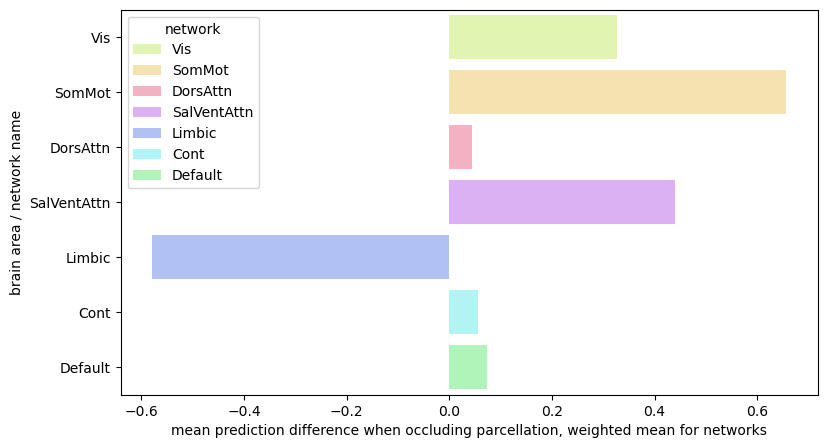

In [14]:
# weighted network mean
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data=weighted_networks_df,
            x='weighted mean',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean prediction difference when occluding parcellation, weighted mean for networks',
       ylabel='brain area / network name')
plt.show()

In [13]:
ax.containers[0][0]

### Redo global explanations with absolute values

In [5]:
occlusion_df['abs pred diff'] = occlusion_df['pred diff'].abs()

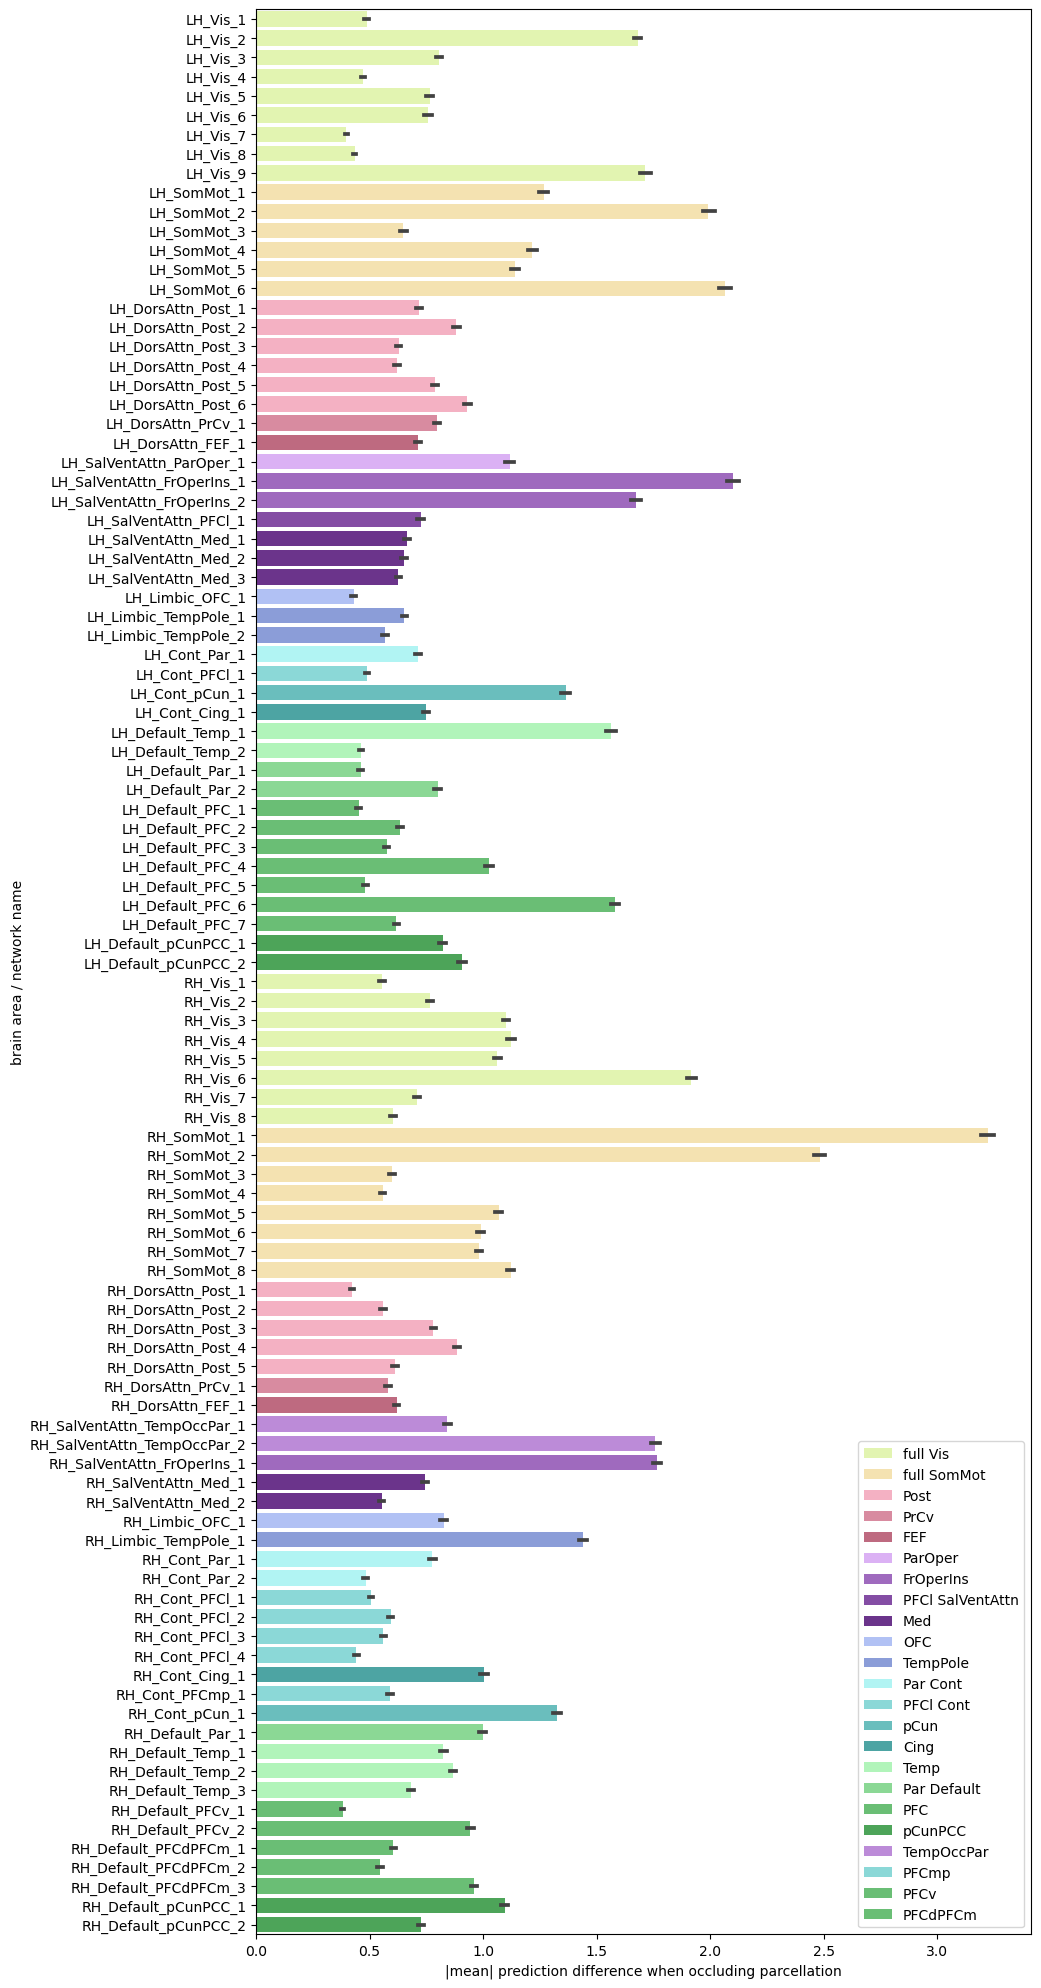

In [6]:
fig, ax = plt.subplots(figsize=(10,25))
sns.barplot(data=occlusion_df,
            x='abs pred diff',
            y='parcellation',
            orient='h',
            hue='area',
            palette=area_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='|mean| prediction difference when occluding parcellation',
       ylabel='brain area / network name')
ax.legend(loc='lower right')
plt.show()

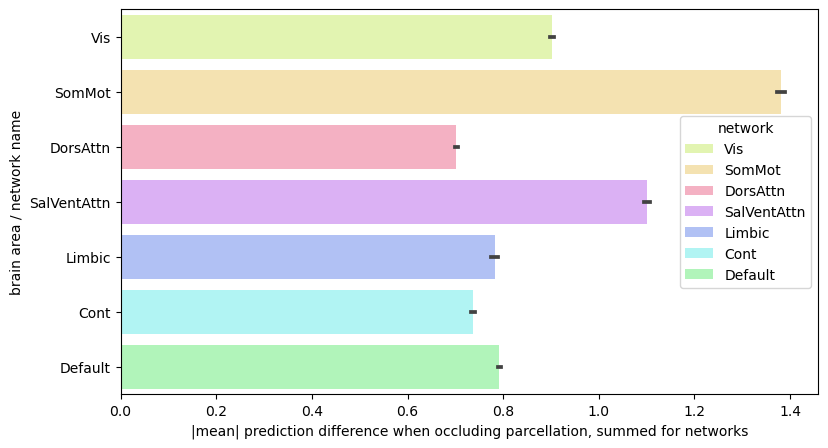

In [7]:
# "raw" network mean
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data=occlusion_df,
            x='abs pred diff',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='|mean| prediction difference when occluding parcellation, summed for networks',
       ylabel='brain area / network name')
plt.show()

In [8]:
# add area mean + area weight column
occlusion_df, area_mean_df = utils.calculate_areamean_weights_df(occlusion_df, 'abs pred diff')
# get weighted networks
weighted_networks_df = utils.get_weighted_network_average(occlusion_df, value='mean area abs pred diff')
weighted_networks_df

,network,weighted mean
0,Vis,0.902500
1,SomMot,1.381852
2,DorsAttn,0.709163
3,SalVentAttn,0.996117
4,Limbic,0.806510
5,Cont,0.658344
6,Default,0.798717


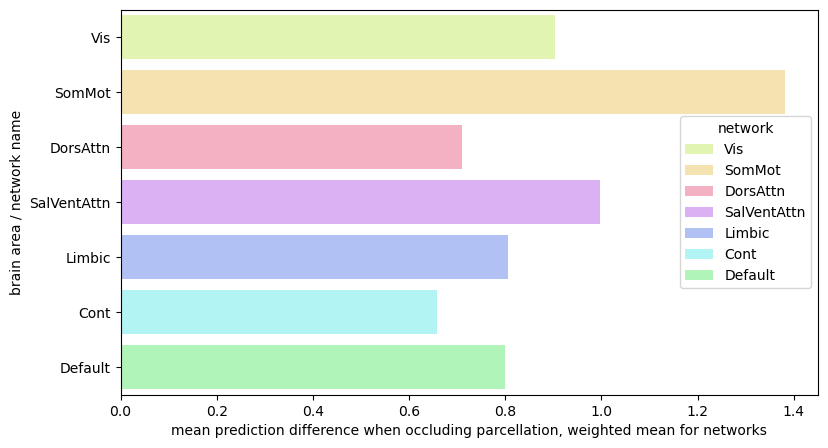

In [9]:
# weighted network mean
fig, ax = plt.subplots(figsize=(9,5))
sns.barplot(data=weighted_networks_df,
            x='weighted mean',
            y='network',
            orient='h',
            hue='network',
            palette=network_colour_map,
            dodge=False,
            ax=ax)
ax.set(xlabel='mean prediction difference when occluding parcellation, weighted mean for networks',
       ylabel='brain area / network name')
plt.show()

## Local explanations

In [14]:
young_sub = utils.get_sub_occlusion(1137757,'shallow','pred diff')
old_sub = utils.get_sub_occlusion(1318155,'shallow','pred diff') 
younger_pred_sub = utils.get_sub_occlusion(1184162,'shallow','pred diff') 
older_pred_sub = utils.get_sub_occlusion(1364474,'shallow','pred diff') 
min_bag_diff_sub = utils.get_sub_occlusion(1031078,'shallow','pred diff') 
max_bag_diff_sub = utils.get_sub_occlusion(1457519,'shallow','pred diff') 

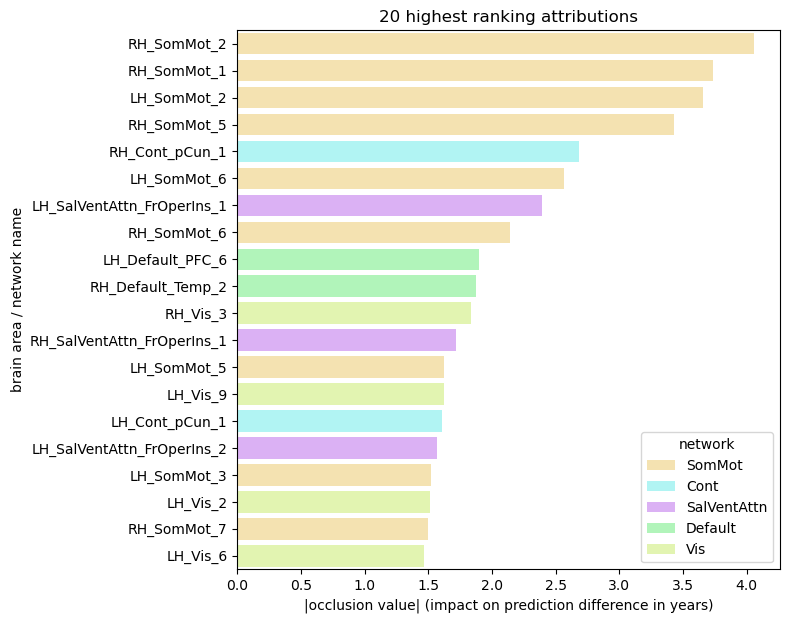

In [24]:
viz.simple_local_explanation(young_sub,'parcellation',
                             'occlusion','prediction difference')

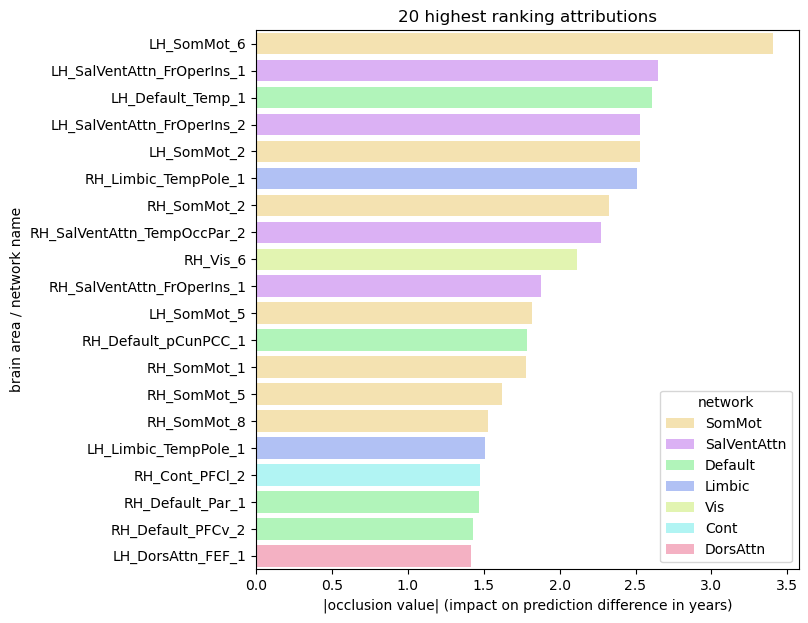

In [25]:
viz.simple_local_explanation(old_sub,'parcellation',
                             'occlusion','prediction difference')

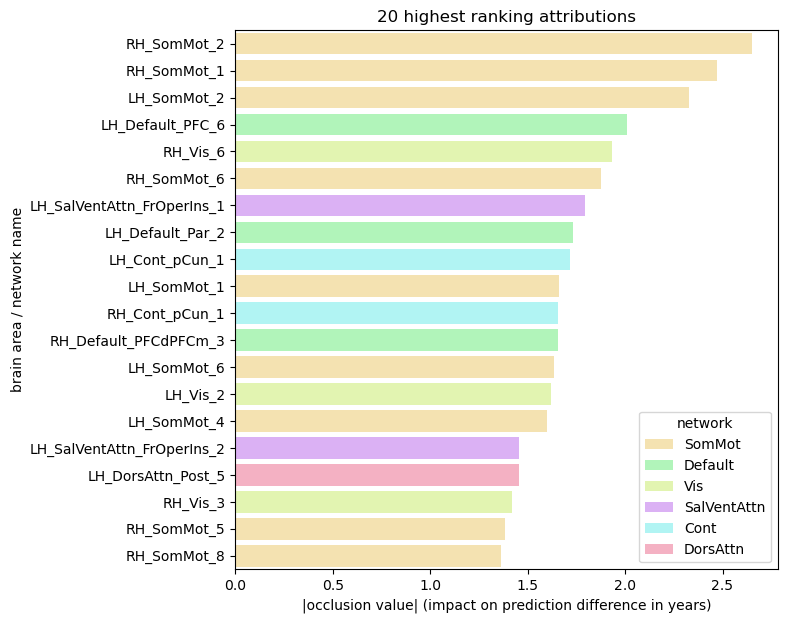

In [26]:
viz.simple_local_explanation(younger_pred_sub,'parcellation',
                             'occlusion','prediction difference')

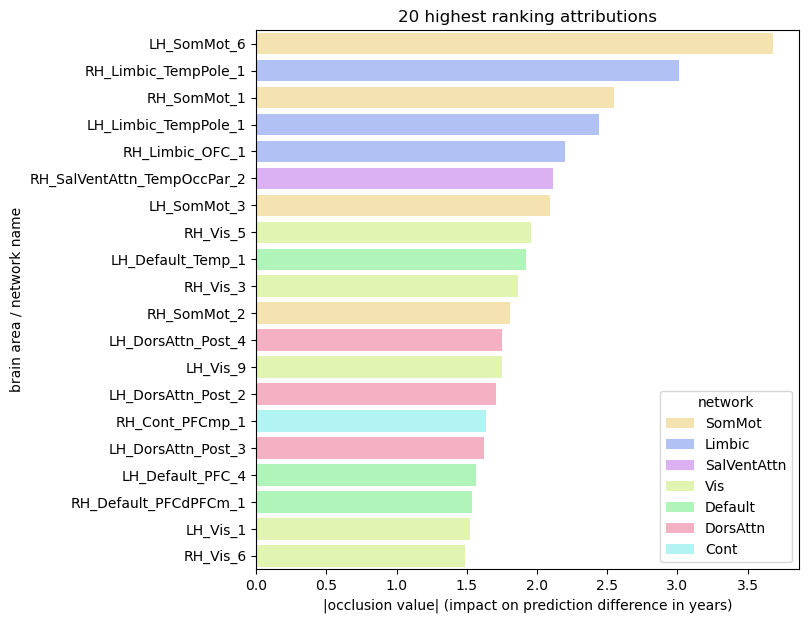

In [27]:
viz.simple_local_explanation(older_pred_sub,'parcellation',
                             'occlusion','prediction difference')

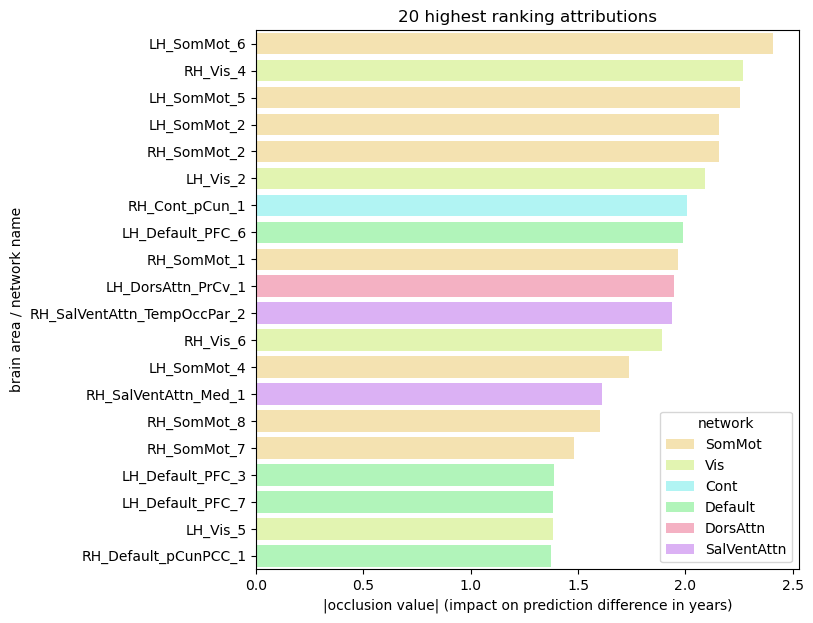

In [28]:
viz.simple_local_explanation(min_bag_diff_sub,'parcellation',
                             'occlusion','prediction difference')

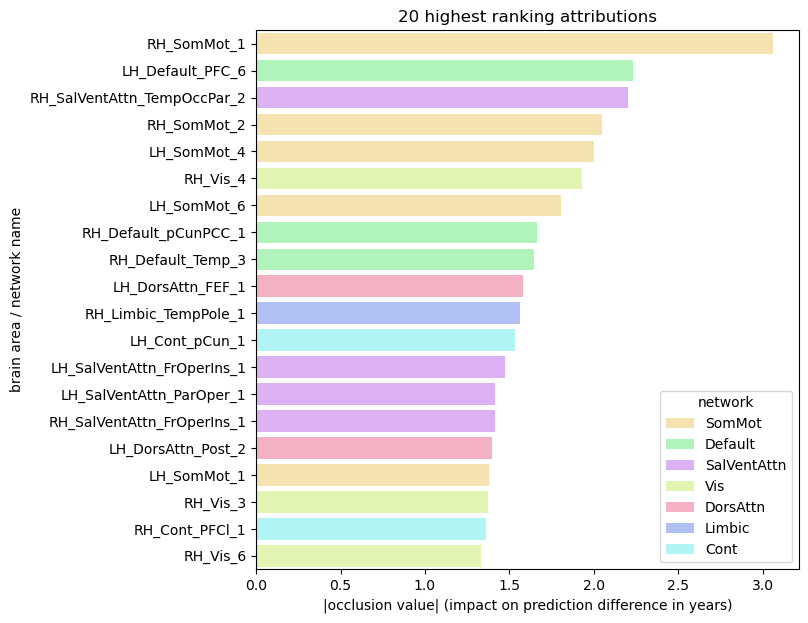

In [29]:
viz.simple_local_explanation(max_bag_diff_sub,'parcellation',
                             'occlusion','prediction difference')